# SERIE DE COMANDOS PARA INSTALLAR DEPENDENCIAS Y LIBRERIAS


In [2]:
# ESCOMENTA LO DE ABAJO PARA EJECUTAR LA PRIMERA VEZ SI TIENES PROBLEMAS
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install missingno
# %pip install termcolor

___Recomiendo tambien instalar la extensions "Data Wrangler" de visual studio.___

# IMPORTE DE LIBRERIAS

In [3]:
# En Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# sys: Manejo del entorno de ejecución del sistema.
import sys

# termcolor: Texto coloreado en la terminal.
from termcolor import colored

# sklearn.preprocessing: Transformación y escalado de datos.
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

# numpy: Cálculos numéricos y manejo de matrices.
import numpy as np

# pandas: Análisis y manipulación de datos.
import pandas as pd

# Configuraciones para pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.expand_frame_repr', False)  # No ajustar automáticamente el contenido de los DataFrames
pd.set_option('display.max_colwidth', None)  # Mostrar el contenido completo de cada columna

# matplotlib.pyplot: Gráficos y visualización de datos.
import matplotlib.pyplot as plt

# seaborn: Gráficos estadísticos estilizados.
import seaborn as sns

# missingno: Visualización de datos faltantes.
import missingno as msno


# COMPROBACIONES BASICAS

#### Carga del dataset

In [13]:
df = pd.read_csv('./bmw_pricing_v3.csv')

#### Información general del DataFrame
Esto muestra el número de entradas, las columnas y el tipo de datos.

In [18]:
print(colored("\nInformación general del DataFrame:", 'green', attrs=['reverse', 'blink']))
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-nu

#### Revisión de columnas
Aquí mostramos los nombres de todas las columnas disponibles.

In [17]:
print(colored("\nColumnas del DataFrame:", 'green', attrs=['reverse', 'blink']))
df.columns


Columnas del DataFrame:


Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta'],
      dtype='object')

#### Primeras filas del DataFrame
Visualizamos las primeras filas para hacernos una idea de los datos.


In [ ]:
print(colored("\nPrimeras filas del DataFrame:", 'green', attrs=['reverse', 'blink']))
df.head()

#### Revisión de valores nulos
Verificamos cuántos valores faltan por columna para determinar si se requiere limpieza de datos.

In [ ]:
print(colored("\nValores nulos por columna:", 'green', attrs=['reverse', 'blink']))
df.isnull().sum()

#### Descripción estadística
Obtenemos un resumen estadístico de las columnas numéricas, como 'km' y 'potencia'.

In [ ]:
print(colored("\nResumen estadístico de las columnas numéricas:", 'green', attrs=['reverse', 'blink']))
df.describe()

#### Comprobación de valores únicos en las columnas categóricas
Esto nos ayuda a entender la diversidad de valores en cada columna categórica y a mostrar ejemplos ordenados.

In [39]:
# Lista de columnas categóricas
categorical_columns = ['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
                       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
                       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
                       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta']

# Ordenar las columnas por la cantidad de valores únicos en orden ascendente
sorted_columns = sorted(categorical_columns, key=lambda col: df[col].nunique())

# Crear un diccionario para almacenar los valores únicos
unique_values_dict = {}

# Iterar sobre las columnas ordenadas
for col in sorted_columns:
    unique_values_count = df[col].nunique()  # Número de valores únicos
    print(colored(f"\n{col}:", 'yellow'))
    print(f"\033[1m{unique_values_count} valores únicos\033[0m")

    # Si la columna tiene 100 o menos valores únicos, almacenamos los valores
    if unique_values_count <= 100:
        unique_values = df[col].dropna().unique()[:100]  # Obtén hasta 100 valores únicos
        unique_values_dict[col] = unique_values
    else:
        # Si hay más de 100 valores únicos, solo mostramos la cantidad
        print(colored(f" Demasiados valores únicos para mostrar (más de 100): {unique_values_count}", 'red'))

# Crear un DataFrame de los valores únicos con columnas alineadas horizontalmente
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))

# Reemplazar NaN con cadenas vacías
unique_values_df = unique_values_df.fillna('')


marca:
1 valores únicos

volante_regulable:
2 valores únicos

aire_acondicionado:
2 valores únicos

camara_trasera:
2 valores únicos

asientos_traseros_plegables:
2 valores únicos

elevalunas_electrico:
2 valores únicos

bluetooth:
2 valores únicos

gps:
2 valores únicos

alerta_lim_velocidad:
2 valores únicos

tipo_gasolina:
5 valores únicos

tipo_coche:
8 valores únicos

color:
10 valores únicos

fecha_venta:
13 valores únicos

potencia:
61 valores únicos

modelo:
76 valores únicos

fecha_registro:
180 valores únicos
 Demasiados valores únicos para mostrar (más de 100): 180

precio:
437 valores únicos
 Demasiados valores únicos para mostrar (más de 100): 437

km:
4784 valores únicos
 Demasiados valores únicos para mostrar (más de 100): 4784


#### Visualizacion de valores categoricos

In [40]:
display(unique_values_df)

,marca,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,tipo_gasolina,tipo_coche,color,fecha_venta,potencia,modelo
0,BMW,True,True,False,False,True,True,True,True,diesel,convertible,black,2018-01-01,100.0,118
1,,False,False,True,True,False,False,False,False,petrol,coupe,grey,2018-02-01,317.0,M4
2,,,,,,,,,,hybrid_petrol,estate,white,2018-04-01,120.0,320
3,,,,,,,,,,Diesel,hatchback,red,2018-03-01,135.0,420
4,,,,,,,,,,electro,sedan,silver,2018-09-01,160.0,425
5,,,,,,,,,,,subcompact,blue,2018-05-01,225.0,335
6,,,,,,,,,,,suv,orange,2018-06-01,145.0,325
7,,,,,,,,,,,van,beige,2018-07-01,105.0,Z4
8,,,,,,,,,,,,brown,2018-08-01,125.0,120
9,,,,,,,,,,,,green,2007-08-01,130.0,220


#### NEXT

Quitar marca
Ver si podemos hacer algo con la fecha de registro


Visualización de valores faltantes:


<Axes: >

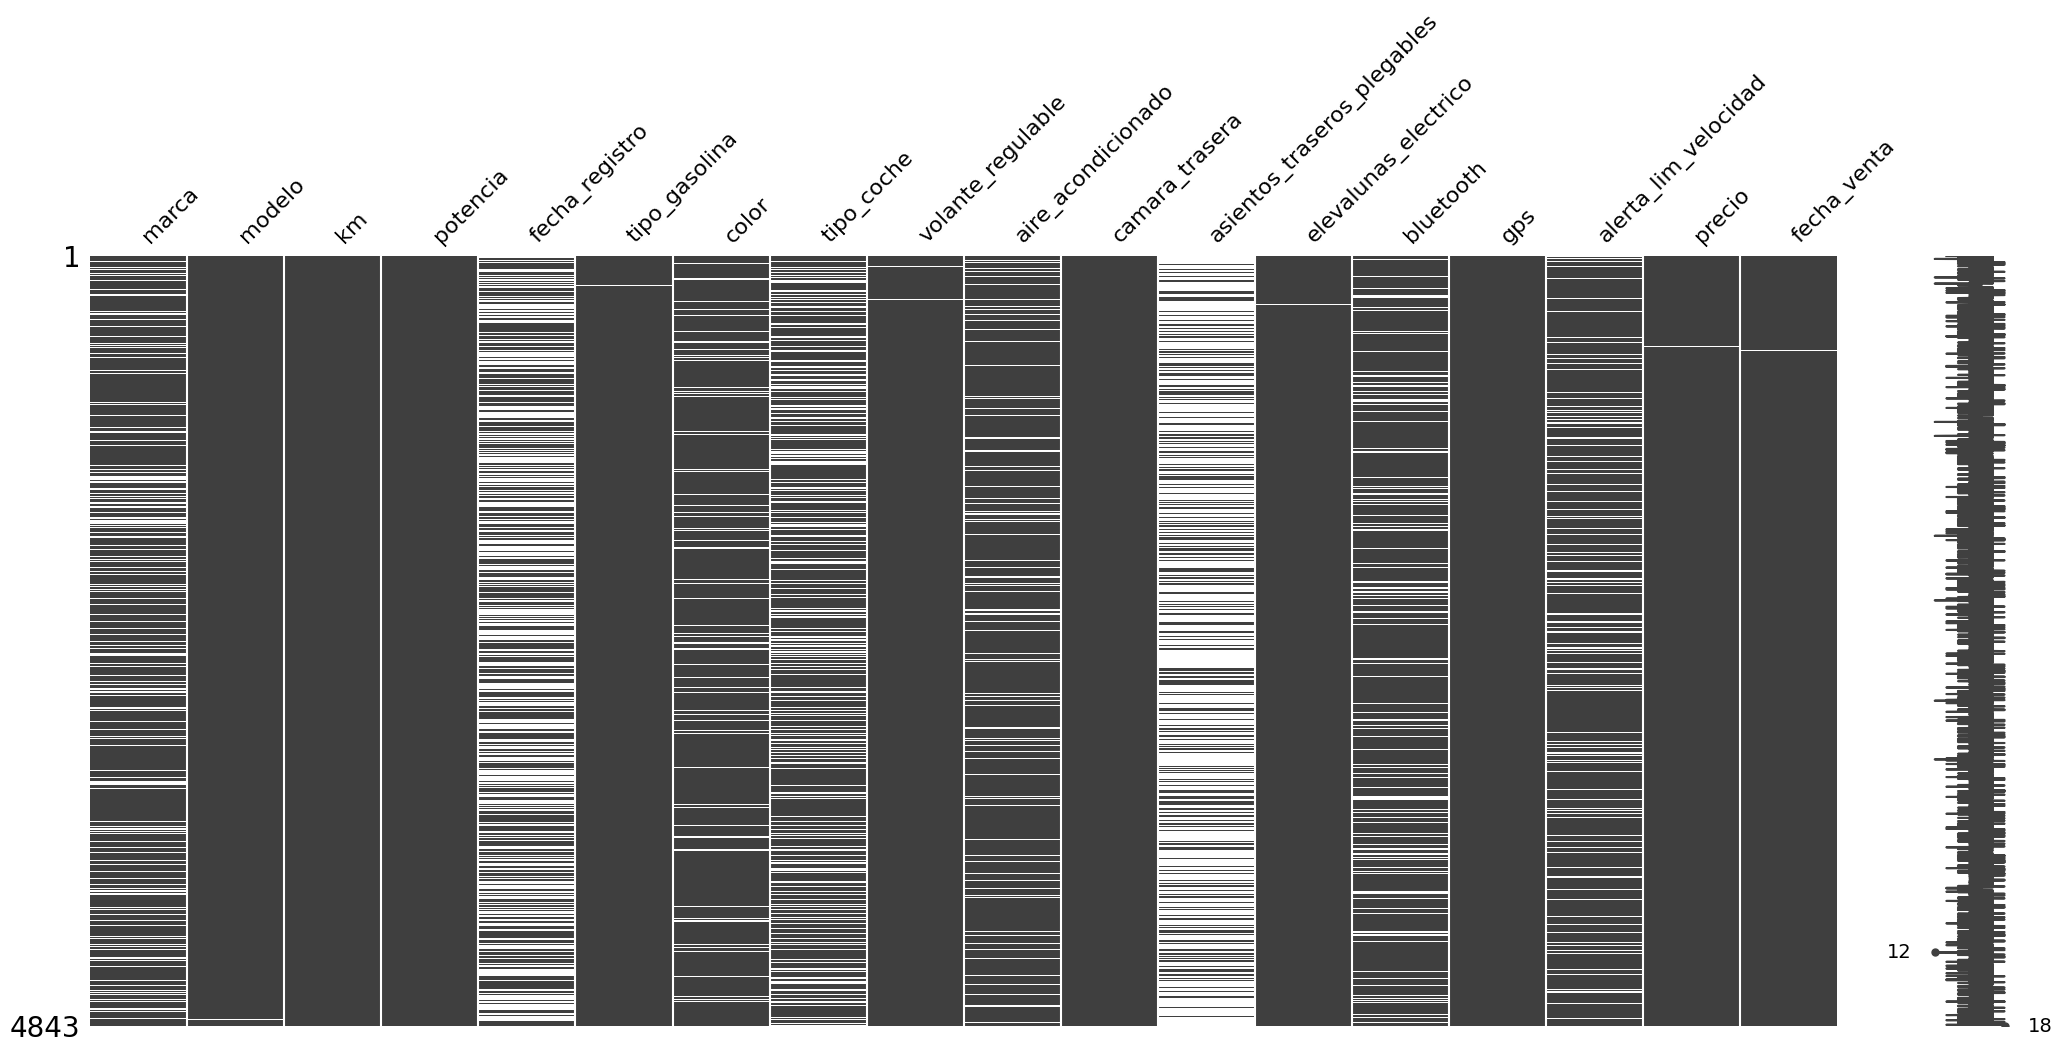


Distribución de 'precio':


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='precio', ylabel='Count'>

Text(0.5, 1.0, "Distribución de 'precio'")

Text(0.5, 0, 'Precio')

Text(0, 0.5, 'Frecuencia')

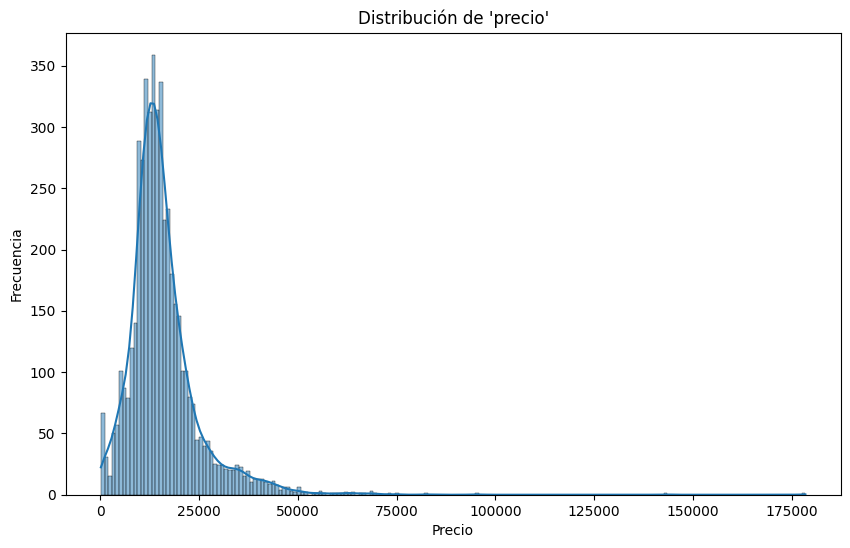


Matriz de correlación:


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de correlación')

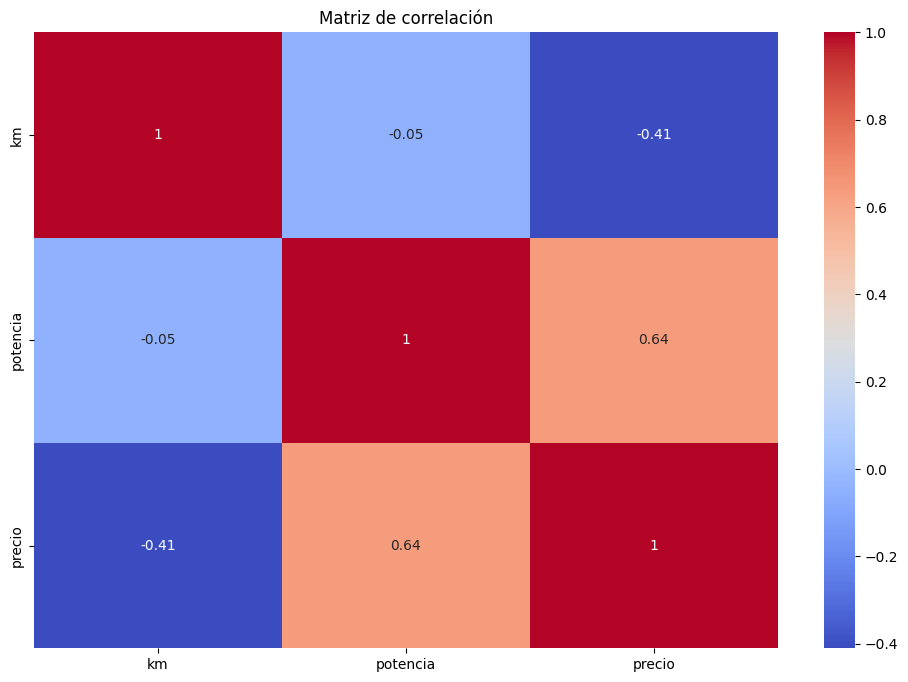

In [41]:
# Visualización de valores faltantes
# Utilizamos missingno para visualizar los valores nulos en el DataFrame.
print(colored("\nVisualización de valores faltantes:", 'green', attrs=['reverse', 'blink']))
msno.matrix(df)
plt.show()


# Visualización de la distribución de 'precio'
# Analizamos la distribución del target 'precio' para entender mejor el rango y la dispersión de los datos.
print(colored("\nDistribución de 'precio':", 'green', attrs=['reverse', 'blink']))
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], kde=True)
plt.title("Distribución de 'precio'")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
# Exploramos las correlaciones entre las variables numéricas, seleccionando solo las columnas numéricas.
print(colored("\nMatriz de correlación:", 'green', attrs=['reverse', 'blink']))
numeric_df = df.select_dtypes(include=['number'])  # Selecciona solo las columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [5]:
df_m_420 = df[df['modelo'] == "420"]


In [6]:
corr = df.corr(numeric_only = True)

In [7]:
# Convert "fecha_registro" to datetime
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'])

# Extract year and month from "fecha_registro"
df['fecha_registro_year'] = df['fecha_registro'].dt.year
# df['fecha_registro_month'] = df['fecha_registro'].dt.month

# # Create a pivot table for the heatmap
# pivot_table = df.pivot_table(values='precio', index='fecha_registro_year', columns='fecha_registro_month', aggfunc='mean')

# # Plot the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="viridis")
# plt.title("Heatmap of Precio by Year and Month")
# plt.xlabel("Month")
# plt.ylabel("Year")
# plt.show()

In [8]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_year
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2012.0
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2012.0
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN


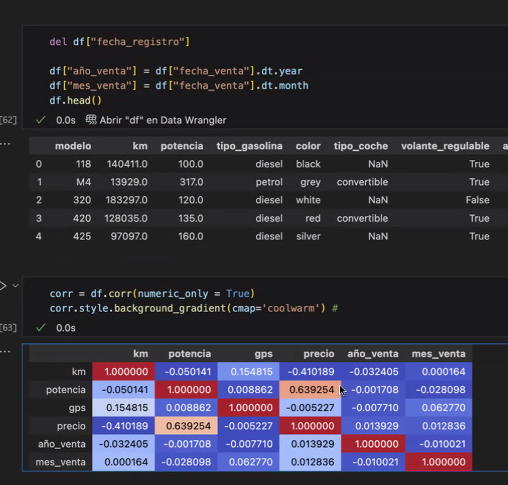

In [9]:
# Matriz de correlación
# Exploramos las correlaciones entre las variables numéricas, seleccionando solo las columnas numéricas.
# print(colored("\nMatriz de correlación:", 'green', attrs=['reverse', 'blink']))


# numeric_df = df.select_dtypes(include=['number'])  # Selecciona solo las columnas numéricas
# plt.figure(figsize=(12, 8))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.title("Matriz de correlación")
# plt.show()


corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio,fecha_registro_year
km,1.000000,-0.050141,0.154815,-0.410189,-0.483464
potencia,-0.050141,1.000000,0.008862,0.639254,0.092517
gps,0.154815,0.008862,1.000000,-0.005227,-0.077771
precio,-0.410189,0.639254,-0.005227,1.000000,0.427901
fecha_registro_year,-0.483464,0.092517,-0.077771,0.427901,1.000000


In [10]:
# # Matriz de correlación
# # Exploramos las correlaciones entre las variables numéricas, seleccionando solo las columnas numéricas.
# print(colored("\nMatriz de correlación:", 'green', attrs=['reverse', 'blink']))
# numeric_df = df.select_dtypes(include=['number'])  # Selecciona solo las columnas numéricas
# plt.figure(figsize=(12, 8))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.title("Matriz de correlación")
# plt.show()